In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
import tempfile
import pygraphviz
import matplotlib

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.23.5
scipy      : 1.10.0
pomegranate: 0.14.4

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [18]:
disease = DiscreteDistribution({'T': 0.2, 'F': 0.8})

### 4. Fie o noua trasatura, c3, care este influentata de prezenta trasaturii c2 intr-o proba.
### In tabelul de mai jos specificam probabilitatile pentru c3 conditionat de disease si c2. De exemplu: daca C2 e False => 30% sanse ca C3 sa fie True

In [19]:
# Conditional distribution for the c1 trait to appear in a probe
c1 = ConditionalProbabilityTable(
        [[ 'T','T', 0.3 ],
         [ 'T','F', 0.7 ],
         [ 'F','T', 0.2 ],
         [ 'F','F', 0.8 ]], [disease]) 

# Conditional distribution for the c2 trait to appear in a probe
c2 = ConditionalProbabilityTable(
        [[ 'T','T', 0.5 ],
         [ 'T','F', 0.5 ],
         [ 'F','T', 0.1 ],
         [ 'F','F', 0.9 ]], [disease]) 

# Conditional distribution for the c3 trait to appear in a probe
c3 = ConditionalProbabilityTable(
        [[ 'T','T', 0.6 ],
         [ 'T','F', 0.4 ],
         [ 'F','T', 0.3 ],
         [ 'F','F', 0.7 ]], [c2]) 

In [20]:
b = State(disease, name="Disease")
t1 = State(c1, name="C1")
t2 = State(c2, name="C2")
t3 = State(c3, name="C3")

In [21]:
def plot(model, filename=None):
        """Draw this model's graph using pygraphviz.
        Returns
        -------
        None
        """

        if pygraphviz is not None:
            G = pygraphviz.AGraph(directed=True)

            for state in model.states:
                G.add_node(state.name, color='red')

            for parent, child in model.edges:
                G.add_edge(parent.name, child.name)

            if filename is None:
                with tempfile.NamedTemporaryFile(mode='w+b') as tf: # w+b is default mode already, just to make sure
                    G.draw(tf, format='png', prog='dot')
                    img = matplotlib.image.imread(tf)
                    plt.imshow(img)
                    plt.axis('off')
            else:
                G.draw(filename, format='pdf', prog='dot')

        else:
            raise ValueError("must have matplotlib and pygraphviz installed for visualization")

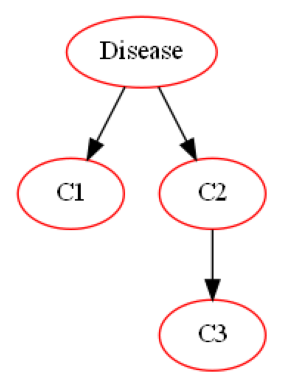

In [22]:
# Create the Bayesian network object
model = BayesianNetwork("Exercise 3: Laboratory probes")

# Add the states to the network 
model.add_states(b,t1,t2,t3)

# Connect the states
model.add_edge(b,t1)
model.add_edge(b,t2)
model.add_edge(t2,t3)

# # Integrate everything
model.bake()

# #Draw the network
plot(model)

In [26]:
model.predict_proba(numpy.array(['T', 'F', 'T', None], ndmin=2))

[array(['T', 'F', 'T', {
                           "class" : "Distribution",
                           "dtype" : "str",
                           "name" : "DiscreteDistribution",
                           "parameters" : [
                               {
                                   "F" : 0.4000000000000001,
                                   "T" : 0.6
                               }
                           ],
                           "frozen" : false
                       }                                    ], dtype=object)]

In [37]:
model.predict_proba(numpy.array(['T', 'T', 'T', None], ndmin=2))

[array(['T', 'T', 'T', {
                           "class" : "Distribution",
                           "dtype" : "str",
                           "name" : "DiscreteDistribution",
                           "parameters" : [
                               {
                                   "F" : 0.4000000000000001,
                                   "T" : 0.6
                               }
                           ],
                           "frozen" : false
                       }                                    ], dtype=object)]

### In exemplele de mai sus, putem observa ca C1 nu influenteaza in niciun mod probabilitatea ca C3 sa apara intr-o proba

In [36]:
model.predict_proba(numpy.array(['T', 'T', None, None], ndmin=2))

[array(['T', 'T', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "F" : 0.4999999999999999,
                              "T" : 0.5
                          }
                      ],
                      "frozen" : false
                  }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "F" : 0.5499999999999999,
                    "T" : 0.45
                }
            ],
            "frozen" : false
        }                                    ], dtype=object)]

### In cazul in care nu avem o observatie facuta pentru C2, observam ca C3 este influentat de probabilitatea a C2 de a aparea intr-o proba unde este Disease (adica 0.5).
### In 50% din cazuri, C2 va fi F => pentru ca C3 sa fie T, probabilitatea ar fi = 0.5 * 0.3 = 0.15. Pentru ca C3 sa fie T in cazul in care C2 e T => P = 0.5 * 0.6 = 0.30
### Din asta => probabilitatea ca C3 sa apara intr-o proba cu boala, nestiind starea C2, este de 45%

In [38]:
model.predict_proba(numpy.array(['F', 'T', None, None], ndmin=2))

[array(['F', 'T', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "F" : 0.8999999999999997,
                              "T" : 0.10000000000000037
                          }
                      ],
                      "frozen" : false
                  }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "F" : 0.6699999999999998,
                    "T" : 0.33000000000000024
                }
            ],
            "frozen" : false
        }                                    ], dtype=object)]

### In 90% din cazuri, C2 va fi F => pentru ca C3 sa fie T, probabilitatea ar fi = 0.9 * 0.3 = 0.27. Pentru ca C3 sa fie T in cazul in care C2 e T => P = 0.1 * 0.6 = 0.06.
### Din asta => probabilitatea ca C3 sa apara intr-o proba fara boala, nestiind starea C2, este de 33%